In [12]:
# 라이브러리 로딩
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# -----------------------------
# 1) 데이터 준비(보스턴 집값 데이터)
# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/기계학습프로그래밍/3주/boston.csv").dropna()

print(df)

# PRICE만 땜
X = df.drop(columns=["PRICE"])
y = df['PRICE']

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

       Unnamed: 0  MedInc  HouseAge  AveRooms  AveBedrms  Population  \
0               0  8.3252      41.0  6.984127   1.023810       322.0   
1               1  8.3014      21.0  6.238137   0.971880      2401.0   
2               2  7.2574      52.0  8.288136   1.073446       496.0   
3               3  5.6431      52.0  5.817352   1.073059       558.0   
4               4  3.8462      52.0  6.281853   1.081081       565.0   
...           ...     ...       ...       ...        ...         ...   
20635       20635  1.5603      25.0  5.045455   1.133333       845.0   
20636       20636  2.5568      18.0  6.114035   1.315789       356.0   
20637       20637  1.7000      17.0  5.205543   1.120092      1007.0   
20638       20638  1.8672      18.0  5.329513   1.171920       741.0   
20639       20639  2.3886      16.0  5.254717   1.162264      1387.0   

       AveOccup  Latitude  Longitude  PRICE  
0      2.555556     37.88    -122.23  4.526  
1      2.109842     37.86    -122.22  3.585

In [14]:
# -----------------------------
# 2) 모델 구성
# -----------------------------

model = DecisionTreeRegressor()

In [15]:
# -----------------------------
# 3) 모델 학습
# -----------------------------

model.fit(X_train, y_train)

DecisionTreeRegressor()

In [16]:
# -----------------------------
# 4) 모델 평가
# -----------------------------

y_pred = model.predict(X_test)

# 편차(작을수록 예측 잘됨)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 0.4915787170247577
R²: 0.6248661866735257


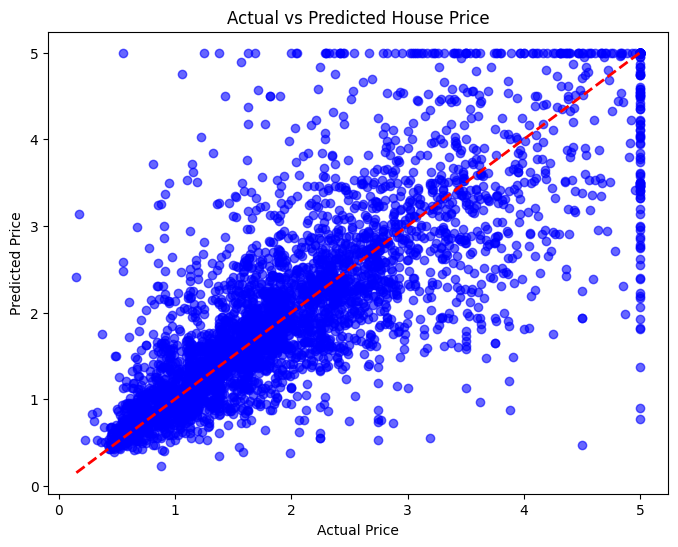

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()